<a href="https://colab.research.google.com/github/sarjakpatel/SecondHandCarPricePrediction/blob/main/GMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 3**

The cleaning of this dataset has been done in the other colab added to this folder.

Importing all the necessary libraries.

In [9]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

mounting google drive.

In [10]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


import cleaned data from drive using pandas

In [11]:
df = pd.read_csv("/content/drive/MyDrive/257/Assignment_2/vehicalesDataCleaned.csv")

df

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,lat,long
0,16,15000,2013,13,7074,0,6,2,128000,0,0,2,10,0,1,32.592000,-85.518900
1,16,27990,2012,14,14119,2,8,2,68696,0,2,0,8,0,1,32.590000,-85.480000
2,16,34590,2016,7,14355,2,6,2,29499,0,2,0,8,9,1,32.590000,-85.480000
3,16,35000,2019,38,15423,0,6,2,43000,0,0,0,10,5,1,32.601300,-85.443974
4,16,29990,2016,7,4510,2,6,2,17302,0,2,0,8,8,1,32.590000,-85.480000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273528,397,23590,2019,30,10747,2,6,2,32226,0,2,1,9,10,50,33.786500,-84.445400
273529,397,30590,2020,40,13522,2,6,2,12029,0,2,1,9,8,50,33.786500,-84.445400
273530,397,34990,2020,6,17570,2,6,0,4174,0,2,1,4,10,50,33.779214,-84.411811
273531,397,28990,2018,23,6376,2,6,2,30112,0,2,1,9,9,50,33.786500,-84.445400


Reducing the number of columns using PCA

In [12]:
scaler =  StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)

pca = PCA(n_components = 2)
transformed_data = pca.fit_transform(scaled_data)
np.cumsum(pca.explained_variance_ratio_ * 100)

array([14.18076916, 23.25591557])

# **Gaussian Mixture**

A Gaussian Mixture is a function that is comprised of several Gaussians, each identified by k ∈ {1,…, K}, where K is the number of clusters of our dataset. Each Gaussian k in the mixture is comprised of the following parameters:
1. A mean that defines its centre.
2. A covariance that defines its width. This would be equivalent to the dimensions of an ellipsoid in a multivariate scenario.
3. A mixing probability that defines how big or small the Gaussian function will be.

Importing library.

Text(0, 0.5, 'Price')

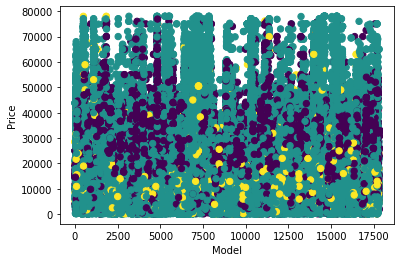

In [13]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components = 3).fit(df)
labels = gmm.predict(df)
plt.scatter(df["model"], df["price"], c=labels, s=40, cmap='viridis')
plt.xlabel('Model')
plt.ylabel('Price')

# **Mean-shift Clustering**

In [6]:
from sklearn.cluster import MeanShift

In [ ]:
clustering = MeanShift(bandwidth=2).fit(df)

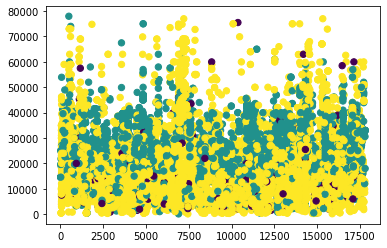

In [ ]:
plt.scatter(df["model"], df["price"], c=labels, s=40, cmap='viridis')

We can see tha we do get similar graph using Gaussian Mixture Model and Mean shift clustering.
But k means gave compareitively better results as we did PCA.

GMM with transformed data.

Text(0, 0.5, 'Feature 2')

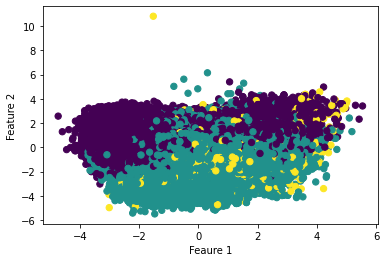

In [14]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components = 3).fit(df)
labels = gmm.predict(df)
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=labels, s=40, cmap='viridis')
plt.xlabel('Feaure 1')
plt.ylabel('Feature 2')

There are a lot of overlaps so we can conclude the kmeans is better for the following data set.